In [133]:
import pandas as pd
import numpy as np
from finance_byu.summarize import summary
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
# Read in crsp monthly data

df = pd.read_feather("crsp_monthly.ftr")

df.head()

,permno,caldt,cusip,ticker,shrcd,excd,siccd,prc,ret,vol,shr,cumfacshr
0,10000,1986-01-31,68391610,OMFGA,10,3,3990,-4.37500,NaN,1771.0,3680.0,1.0
1,10000,1986-02-28,68391610,OMFGA,10,3,3990,-3.25000,-0.257143,828.0,3680.0,1.0
2,10000,1986-03-31,68391610,OMFGA,10,3,3990,-4.43750,0.365385,1078.0,3680.0,1.0
3,10000,1986-04-30,68391610,OMFGA,10,3,3990,-4.00000,-0.098592,957.0,3793.0,1.0
4,10000,1986-05-30,68391610,OMFGA,10,3,3990,-3.10938,-0.222656,1074.0,3793.0,1.0


In [135]:
# Cleaning

df['prc'] = abs(df['prc'])

df.sort_values(by=['permno', 'caldt'], inplace=True)

df = df[['permno', 'caldt', 'prc', 'ret']]

df.head()

,permno,caldt,prc,ret
0,10000,1986-01-31,4.37500,NaN
1,10000,1986-02-28,3.25000,-0.257143
2,10000,1986-03-31,4.43750,0.365385
3,10000,1986-04-30,4.00000,-0.098592
4,10000,1986-05-30,3.10938,-0.222656


In [136]:
# Calculate momentum feature

# Log Returns
df['logret'] = np.log(1 + df['ret'])

# Momentum from t-6 to t-1
df['mom'] = df.groupby('permno')['logret'].rolling(6,6).sum().reset_index(drop=True)
df['mom'] = df.groupby('permno')['mom'].shift(1)

# Holding period returns
df['ret_6'] = df.groupby('permno')['logret'].rolling(6,6).sum().reset_index(drop=True)
df['ret_6'] = df.groupby('permno')['ret_6'].shift(-6)

df

,permno,caldt,prc,ret,logret,mom,ret_6
0,10000,1986-01-31,4.37500,NaN,NaN,NaN,-0.430783
1,10000,1986-02-28,3.25000,-0.257143,-0.297252,NaN,-1.089044
2,10000,1986-03-31,4.43750,0.365385,0.311436,NaN,-1.459321
3,10000,1986-04-30,4.00000,-0.098592,-0.103797,NaN,-1.633155
4,10000,1986-05-30,3.10938,-0.222656,-0.251872,NaN,-1.323014
...,...,...,...,...,...,...,...
4889699,93436,2023-08-31,258.07999,-0.034962,-0.035588,0.434296,NaN
4889700,93436,2023-09-29,250.22000,-0.030456,-0.030929,0.226803,NaN
4889701,93436,2023-10-31,200.84000,-0.197346,-0.219832,0.187402,NaN
4889702,93436,2023-11-30,240.08000,0.195379,0.178463,0.200755,NaN


In [137]:
# Filtering by prc greater than 5 and months that momentum is known

df['prclag'] = df.groupby('permno')['prc'].shift(1)

df = df.query("mom == mom and prclag >= 5").reset_index(drop=True)

df

,permno,caldt,prc,ret,logret,mom,ret_6,prclag
0,10001,1986-08-29,6.50000,0.072165,0.069680,0.021679,-0.007995,6.06250
1,10001,1986-09-30,6.37500,-0.003077,-0.003082,0.071156,0.031226,6.50000
2,10001,1986-10-31,6.62500,0.039216,0.038467,0.043187,-0.047246,6.37500
3,10001,1986-11-28,7.00000,0.056604,0.055060,0.071801,-0.176415,6.62500
4,10001,1986-12-31,7.00000,0.015000,0.014889,0.136713,-0.141153,7.00000
...,...,...,...,...,...,...,...,...
3640294,93436,2023-08-31,258.07999,-0.034962,-0.035588,0.434296,NaN,267.42999
3640295,93436,2023-09-29,250.22000,-0.030456,-0.030929,0.226803,NaN,258.07999
3640296,93436,2023-10-31,200.84000,-0.197346,-0.219832,0.187402,NaN,250.22000
3640297,93436,2023-11-30,240.08000,0.195379,0.178463,0.200755,NaN,200.84000


In [138]:
# Momentum decile bins

df['mombins'] = df.groupby("caldt")['mom'].transform(lambda x: pd.qcut(x, 10, labels=False))

df

,permno,caldt,prc,ret,logret,mom,ret_6,prclag,mombins
0,10001,1986-08-29,6.50000,0.072165,0.069680,0.021679,-0.007995,6.06250,3
1,10001,1986-09-30,6.37500,-0.003077,-0.003082,0.071156,0.031226,6.50000,5
2,10001,1986-10-31,6.62500,0.039216,0.038467,0.043187,-0.047246,6.37500,6
3,10001,1986-11-28,7.00000,0.056604,0.055060,0.071801,-0.176415,6.62500,6
4,10001,1986-12-31,7.00000,0.015000,0.014889,0.136713,-0.141153,7.00000,8
...,...,...,...,...,...,...,...,...,...
3640294,93436,2023-08-31,258.07999,-0.034962,-0.035588,0.434296,NaN,267.42999,9
3640295,93436,2023-09-29,250.22000,-0.030456,-0.030929,0.226803,NaN,258.07999,9
3640296,93436,2023-10-31,200.84000,-0.197346,-0.219832,0.187402,NaN,250.22000,9
3640297,93436,2023-11-30,240.08000,0.195379,0.178463,0.200755,NaN,200.84000,9


In [139]:
# Form portfolios on momentum bins

# Portfolio df for backtest
port = df.groupby(['caldt', 'mombins'])['ret'].mean().unstack(level=['mombins'])*100

# Portfolio df for summary stats
port_6 = df.groupby(['caldt', 'mombins'])['ret_6'].mean().unstack(level=['mombins'])*100

# Drop rows from port_6 where we don't know the holding return
port_6 = port.dropna()

# Spread portfolios
port['spread'] = port[9] - port[0]
port_6['spread'] = port[9] - port[0]

port.head()

mombins,0,1,2,3,4,5,6,7,8,9,spread
caldt,,,,,,,,,,,
1926-07-31,3.348932,-2.233664,0.706793,1.446566,2.600100,1.811423,0.977534,1.695561,1.290609,3.702002,0.353070
1926-08-31,4.344462,1.505787,3.071715,1.503183,1.467506,2.504346,2.442174,3.699811,3.453564,3.870983,-0.473479
1926-09-30,-4.847727,1.022568,-3.679977,-1.327904,-2.156313,1.419738,0.104089,0.314215,1.171343,1.442313,6.290040
1926-10-30,-6.071606,-3.422992,-5.356492,-4.124200,-2.467343,-2.193773,-1.369979,-2.219351,-4.183377,-4.715527,1.356080
1926-11-30,-3.713686,2.377418,2.160742,3.347039,1.813210,3.965435,5.024271,5.192646,2.968731,1.624820,5.338506


In [140]:
# Summary

summary(port_6).loc[['count','mean','std','tstat']].round(3)

mombins,0,1,2,3,4,5,6,7,8,9,spread
count,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000
mean,0.919,0.977,0.951,0.980,0.980,1.062,1.046,1.033,1.133,1.194,0.275
std,9.178,7.476,6.711,6.160,5.817,5.614,5.519,5.524,5.855,6.881,6.423
tstat,3.424,4.468,4.844,5.439,5.763,6.472,6.484,6.399,6.621,5.936,1.467


In [141]:
# Backtest

# Filtering to the last ~15 years
port = port[port.index >= '2010-01-01']

# Calculating cummulative compounded return using monthly rebalancing
port['cum_ret'] = ((port['spread']/100)+1).cumprod()
port['cum_ret'] = port['cum_ret']-1

port.head()

mombins,0,1,2,3,4,5,6,7,8,9,spread,cum_ret
caldt,,,,,,,,,,,,
2010-01-29,0.077014,-2.135809,-0.596446,-1.538846,-2.229096,-3.197194,-3.768403,-2.788148,-4.104006,-5.340275,-5.417289,-0.054173
2010-02-26,2.531746,2.699809,3.172168,2.886626,3.103374,3.184890,3.619319,4.039861,4.354702,5.834702,3.302956,-0.022933
2010-03-31,6.176013,8.204322,5.929797,5.440274,5.785593,5.718679,7.262981,6.706974,6.421702,6.802108,0.626096,-0.016815
2010-04-30,4.516269,4.428073,3.296542,2.940403,2.907145,3.619831,4.087336,4.528110,4.426297,6.011945,1.495676,-0.002110
2010-05-28,-6.659708,-6.131585,-6.139757,-5.949006,-6.743418,-7.041112,-7.971972,-7.196818,-7.952154,-9.152898,-2.493191,-0.026989


Text(0.5, 0, 'Date')

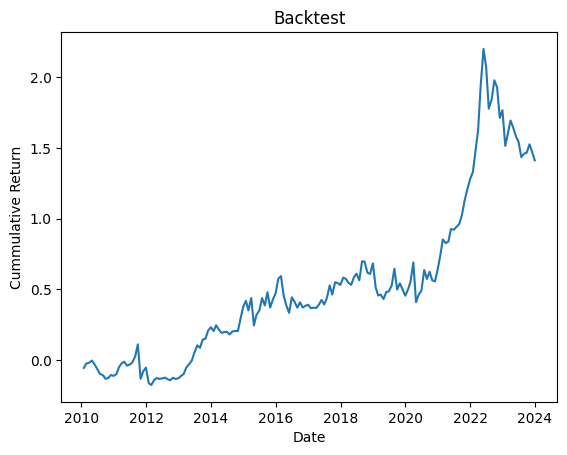

In [142]:
sns.lineplot(data=port,x='caldt',y='cum_ret')
plt.title("Backtest")
plt.ylabel("Cummulative Return")
plt.xlabel("Date")